In [ ]:
!pip install yfinance

In [ ]:
pip install pingouin

In [ ]:
import pandas as pd
import yfinance as yf
import pingouin as pg
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import math

In [ ]:
def yahoo_f(simbolo):
  datos=yf.Ticker(simbolo)
  datos=datos.history(start='2005-01-01',end='2021-06-30')
  datos=pd.Series(datos.iloc[:,3])
  return datos

In [ ]:
apple=yahoo_f('AAPL')
ibm=yahoo_f('IBM')

In [ ]:
apple

Date
2005-01-03 00:00:00-05:00      0.960588
2005-01-04 00:00:00-05:00      0.970452
2005-01-05 00:00:00-05:00      0.978952
2005-01-06 00:00:00-05:00      0.979711
2005-01-07 00:00:00-05:00      1.051045
                                ...    
2021-06-23 00:00:00-04:00    132.151382
2021-06-24 00:00:00-04:00    131.864746
2021-06-25 00:00:00-04:00    131.568222
2021-06-28 00:00:00-04:00    133.218857
2021-06-29 00:00:00-04:00    134.750900
Name: Close, Length: 4151, dtype: float64

In [ ]:
apple=apple.pct_change()#obtener el rendimiento simple diario
ibm=ibm.pct_change()

In [ ]:
apple.dropna(inplace=True)
ibm.dropna(inplace=True)

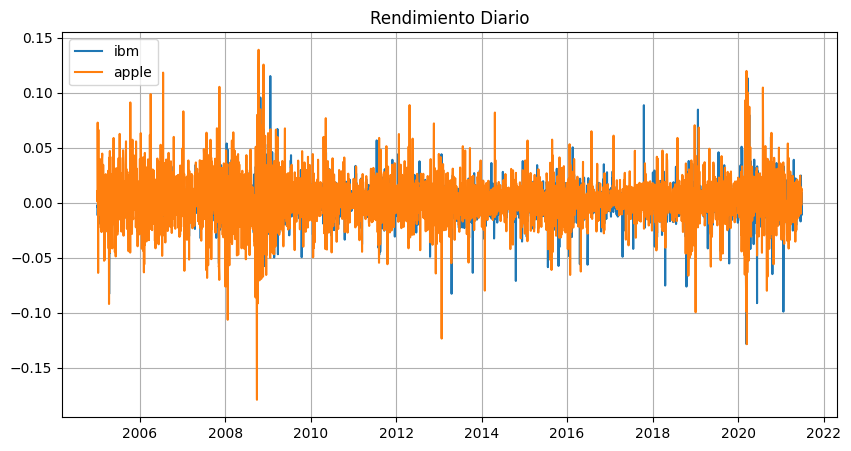

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(ibm,label='ibm')
ax.plot(apple,label='apple')
ax.set_title('Rendimiento Diario')
ax.legend()
plt.grid()
plt.show()

In [ ]:
apple.describe()

count    4150.000000
mean        0.001411
std         0.020928
min        -0.179195
25%        -0.008332
50%         0.001079
75%         0.011973
max         0.139050
Name: Close, dtype: float64

In [ ]:
ibm.describe()

count    4150.000000
mean        0.000309
std         0.014568
min        -0.128507
25%        -0.006320
50%         0.000332
75%         0.007335
max         0.115150
Name: Close, dtype: float64

##Pruebas estadisticas

t.test H0 media de rendimientos=0 h1: media de rendimientos diferente de cero

1. estadistico skewness=sesgo/raiz(6/
   longitud_datos)

   Calcular p-valor: pp=2*(1-pnorm(estadistico))

   h0: sesgo igual a 0  
   
   h1:sesgo distinto a 0

2. Exceso de curtosis
   estadistico=curtosis/raiz(24/longiutd_datos)

   calcular p-valor: pv=2*(1-pnorm(estadistico))
   
   h0: coeficiente de curtosis (kr-3) es igual a 0

   h1: coeficiente de curtosis (kr-3) es distinto a 0

3. Prueba Shapiro
   
   ho: datos siguen distribución normal

   h1: los datos no siguen no siguen distribución normal


### apple

In [ ]:
st.ttest_1samp(apple,0)

TtestResult(statistic=4.343609849629143, pvalue=1.4350895725304414e-05, df=4149)

Se rechaza la hipotesis nula por lo cual la media del rendimiento de apple es distinto de cero

####Sesgo

No se rechaza la hipotesis nula por lo que la media de los rendimientos no es diferente de 0

In [ ]:
#metodo 1 calculo del sesgo
st.skewtest(apple)

SkewtestResult(statistic=-1.2642599932139649, pvalue=0.20613672398946792)

In [ ]:
#metodo 2 calculo del sesgo
st.shapiro(apple)

ShapiroResult(statistic=0.9432625770568848, pvalue=2.9603860504334143e-37)

Esta prueba nos dice que los rendimientos de apple no se distribuyen normalmente

In [ ]:
#metodo 3 calculo del sesgo
sesgo=st.skew(apple)
estadistico=sesgo/math.sqrt(6/len(apple))

In [ ]:
sesgo

-0.04801266549403424

La distribucion de apple es sesgada a derecha

In [ ]:
2*(1-st.norm.cdf(abs(estadistico)))

0.206692770381101

En todas las pruebas anteriores se comprueba el sesgo, por lo que en todas no se rechaza la hipotesis nula comprobando que la distribución es simetrica

#### Curtosis

In [ ]:
print(st.kurtosistest(apple))

KurtosistestResult(statistic=22.15285965173413, pvalue=9.790322461626797e-109)


In [ ]:
kurtosis=st.kurtosis(apple)

In [ ]:
kurtosis

5.411638497710371

la distribución de apple es leptocurtica

In [ ]:
estadistico_k=kurtosis/(math.sqrt(24/len(apple)))

In [ ]:
2*(1-st.norm.cdf(estadistico_k))

0.0

Se rechaza la hipositesis nula de curtosis por lo cual el coeficiente es distinto de cero

### ibm

In [ ]:
st.ttest_1samp(ibm,0)

TtestResult(statistic=1.3675146470188875, pvalue=0.1715381211984287, df=4149)

La media de los rendimientos de ibm no es distinta de cero

####Sesgo

In [ ]:
#metodo 1
st.skewtest(ibm)

SkewtestResult(statistic=-5.912385257681033, pvalue=3.371887301636699e-09)

In [ ]:
#metodo 2
st.shapiro(ibm)

ShapiroResult(statistic=0.9088921546936035, pvalue=1.961817850054744e-44)

La distribución de los rendimientos de IBM no es normal

In [ ]:
#metodo 3
sesgo=st.skew(ibm)

In [ ]:
sesgo

-0.22722598719895437

La distribución de ibm es sesgada a derecha

In [ ]:
estadistico=sesgo/math.sqrt(6/len(ibm))

In [ ]:
2*(1-st.norm.cdf(abs(estadistico)))

2.2876345262545783e-09

Se rechaza la hipotesis nula por lo cual el sesgo de la distribucíón de los rendimientos de ibm es distinto de 0

#### Curtosis

In [ ]:
st.kurtosistest(ibm)

KurtosistestResult(statistic=25.764556871613667, pvalue=2.2142997829124855e-146)

In [ ]:
kurtosis=st.kurtosis(ibm)

In [ ]:
kurtosis

8.457094190944416

la distribución de ibm es leptocurtica

In [ ]:
estadistico_kf=kurtosis/(math.sqrt(24/len(ibm)))

In [ ]:
2*(1-st.norm.cdf(estadistico_kf))

0.0

Se rechaza la hipotesis nula por lo cual curtosis es distinto de cero

#Graficas de densidad de los activos

<Axes: ylabel='Density'>

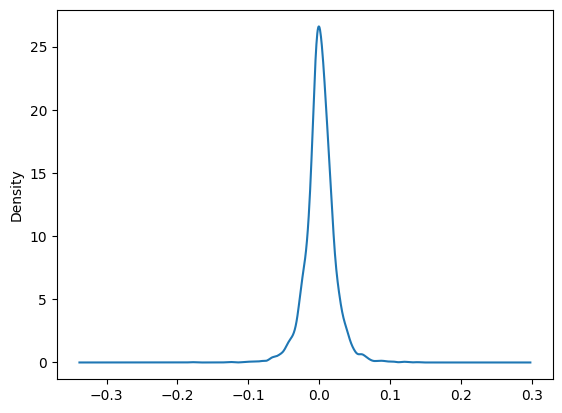

In [ ]:
apple.plot(kind='kde')

<Axes: ylabel='Density'>

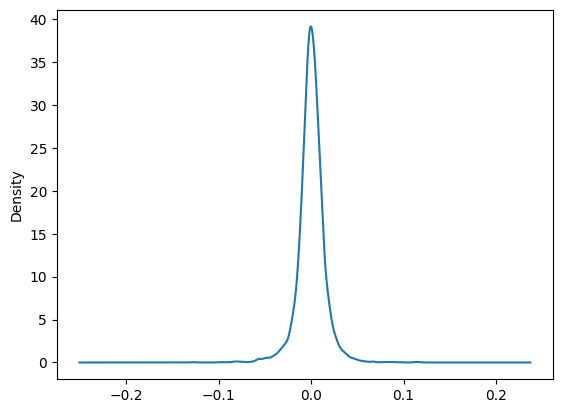

In [ ]:
ibm.plot(kind='kde')